## Probabilidad empírica

De manera frecuente dentro del estudio de la probabilidad, escuchamos cosas tales como _La ley de los grandes números_ o _La falacia del apostador_, que dentro de una primera impresión nos resulta sencillo e intuitivo; sin embargo, a medida que nos adentramos al estudio de ésta disciplina, las cosas tienden a dejar de parecer tan intuitivas para tornarse un poco más complejas y sofisticadas. A pesar de ello, la probabilidad busca en cierta medida explicar o medir fénomenos de incertidumbre, que no necesariamente resulten complicados de entender, sino es en el planteamiento matemático y la formalización donde las cosas tienden a parecer más complicadas.

La probabilidad empírica rescata este factor de fácil asimilación, pues es la experimentación y la interacción con la misma la que permite conectar la lógica matemática implícita en el cálculo de probabilidades con la forma en la que interpretamos probabilidades.

Para afianzar esta idea decidí elaborar el siguiente ejercicio:

### Ejercicio

Supongamos que en una ciudad hay 700 conductores de Taxi, Uber, Didi, InDriver, o cualquier plataforma; y eres una persona que utiliza el servicio con frecuencia para asistir a su trabajo: ¿Cuál es la probabilidad de que al menos se repita un conductor si realizas alrededor de 250 viajes al año?

In [1]:
# Importamos librerías

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Definimos la función viaje en donde al ejecutarse te asigna un viaje con cualquiera de los 700 conductores

def viaje():
    return np.random.randint(1, 700)

In [4]:
viaje()

331

In [22]:
# Agregamos una lista de 250 de largo con conductores

lista_conductores = [viaje() for _ in range(250)]

In [56]:
unique, counts = np.unique(lista_conductores, return_counts=True)

result = np.column_stack((unique, counts))

(result[:,1] > 1).sum() # Número de veces que un conductor se repitio más de una vez

39

In [60]:
(result[:,1] > 1).sum() / len(lista_conductores) # Probabilidad

0.156

In [63]:
def experimentos(intentos):
    probabilidades = []
    for _ in range(intentos):
        lista_conductores = [viaje() for _ in range(250)]
        unique, counts = np.unique(lista_conductores, return_counts=True)
        result = np.column_stack((unique, counts))
        p = (result[:,1] > 1).sum() / len(lista_conductores)
        probabilidades.append(p)
    return probabilidades

In [76]:
experimentos(10) 

[0.128, 0.136, 0.148, 0.14, 0.144, 0.116, 0.176, 0.144, 0.108, 0.152]

In [119]:
x = np.array(experimentos(1000))
promedios = []
for i in range(1,len(x)):
    promedios.append(x[:i].sum()/(i))

In [132]:
media = np.mean(promedios) # Probabilidad de repetir al menos un viaje con algún conductor en 250 viajes
media

0.14146822964056438

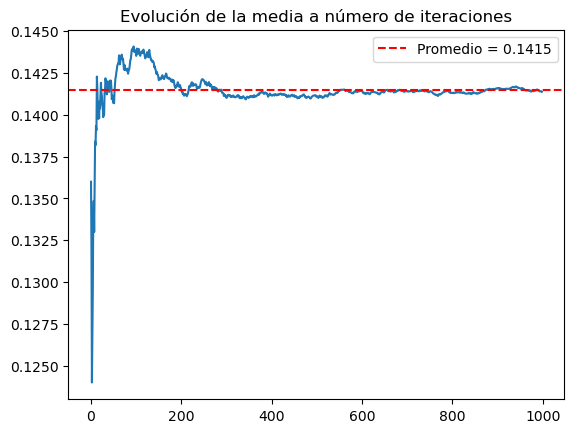

In [135]:
plt.title('Evolución de la media a número de iteraciones')
plt.style.use('default')
plt.plot(promedios)
plt.axhline(media, ls="--",c='red', label=f'Promedio = {media.round(4)}')
plt.legend()
plt.show()